<a href="https://colab.research.google.com/github/Cosmosfurkan/NLP-WebsiteClassifier/blob/master/ProjeCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from sklearn.utils import shuffle
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import cv2
import PIL

# Verilerin bulunduğu klasörün yolu
folder_path = '/content/drive/My Drive/ChestXray'

# Sınıfların adları
classes = ['NORMAL', 'PNEUMONIA']

# Verileri tutacak listeler
data = []
labels = []

# Her sınıf için
for index, class_name in enumerate(classes):
    # Sınıfın bulunduğu klasörün yolu
    class_path = os.path.join(folder_path, class_name)
    # Dosyaların bulunduğu klasördeki her dosya için
    for filename in os.listdir(class_path):
        # Dosyanın yolunu oluştur
        img_path = os.path.join(class_path, filename)
        # Dosyayı oku
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Dosyanın boyutunu yeniden boyutlandır
        img = cv2.resize(img, (28, 28))
        # Veri listesine ekle
        data.append(img)
        # Etiketi listesine ekle
        labels.append(index)

# Verileri ve etiketleri NumPy dizilerine dönüştür
data = np.array(data)
labels = np.array(labels)

# Verileri karıştır
data, labels = shuffle(data, labels)

#Normalizasyon
data = data.astype("float32") / 255.0

# Datalar karışık olduğundan %80,%20 olacak şekilde kullanılır
split_index = int(len(data) * 0.8)
x_train, y_train = data[:split_index], labels[:split_index]
x_test, y_test = data[split_index:], labels[split_index:]


# Verilerin boyutunu ekrana yazdır
print('Eğitim verisi boyutu:', x_train.shape)
print('Test verisi boyutu:', x_test.shape)


Eğitim verisi boyutu: (2633, 28, 28)
Test verisi boyutu: (659, 28, 28)


In [ ]:
#en iyi model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 128)         0

None
Epoch 1/50
88/88 - 9s - loss: 0.5988 - accuracy: 0.6601 - val_loss: 0.3989 - val_accuracy: 0.8649 - 9s/epoch - 101ms/step
Epoch 2/50
88/88 - 8s - loss: 0.3448 - accuracy: 0.8519 - val_loss: 0.2388 - val_accuracy: 0.9272 - 8s/epoch - 87ms/step
Epoch 3/50
88/88 - 8s - loss: 0.2683 - accuracy: 0.8853 - val_loss: 0.2000 - val_accuracy: 0.9378 - 8s/epoch - 86ms/step
Epoch 4/50
88/88 - 8s - loss: 0.2280 - accuracy: 0.9039 - val_loss: 0.1577 - val_accuracy: 0.9439 - 8s/epoch - 86ms/step
Epoch 5/50
88/88 - 8s - loss: 0.2099 - accuracy: 0.9107 - val_loss: 0.1725 - val_accuracy: 0.9317 - 8s/epoch - 91ms/step
Epoch 6/50
88/88 - 7s - loss: 0.2227 - accuracy: 0.9088 - val_loss: 0.1571 - val_accuracy: 0.9499 - 7s/epoch - 80ms/step
Epoch 7/50
88/88 - 8s - loss: 0.1811 - accuracy: 0.9313 - val_loss: 0.1360 - val_accuracy: 0.9530 - 8s/epoch - 95ms/step
Epoch 8/50
88/88 - 7s - loss: 0.1887 - accuracy: 0.9218 - val_loss: 0.1492 - val_accuracy: 0.9484 - 7s/epoch - 76ms/step
Epoch 9/50
88/88 - 8s - lo

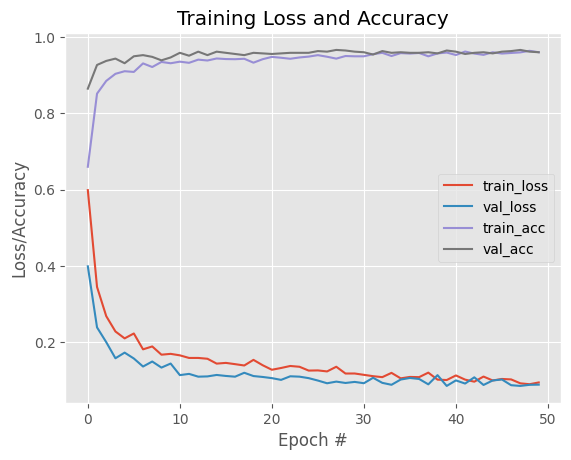

In [4]:
from keras import regularizers

model = keras.models.Sequential()
model.add(keras.Input(shape=(28, 28, 1)))  # Add channel dimension
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.6))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
print(model.summary())

# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(lr=0.0001)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)

# training
batch_size = 30
epochs = 50

# Reshape the input data to have a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

H = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs, verbose=2)

# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

training_loss = H.history['loss']
epoch_count = len(training_loss)

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epoch_count), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch_count), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch_count), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch_count), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [9]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

21/21 [==============================] - 0s 16ms/step


In [10]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

21/21 [==============================] - 0s 18ms/step - loss: 0.0885 - accuracy: 0.9605

Test accuracy: 0.9605462551116943


In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'black'


  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)
plt.rcParams.update({'font.size': 7})

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('black')
  thisplot[true_label].set_color('blue')

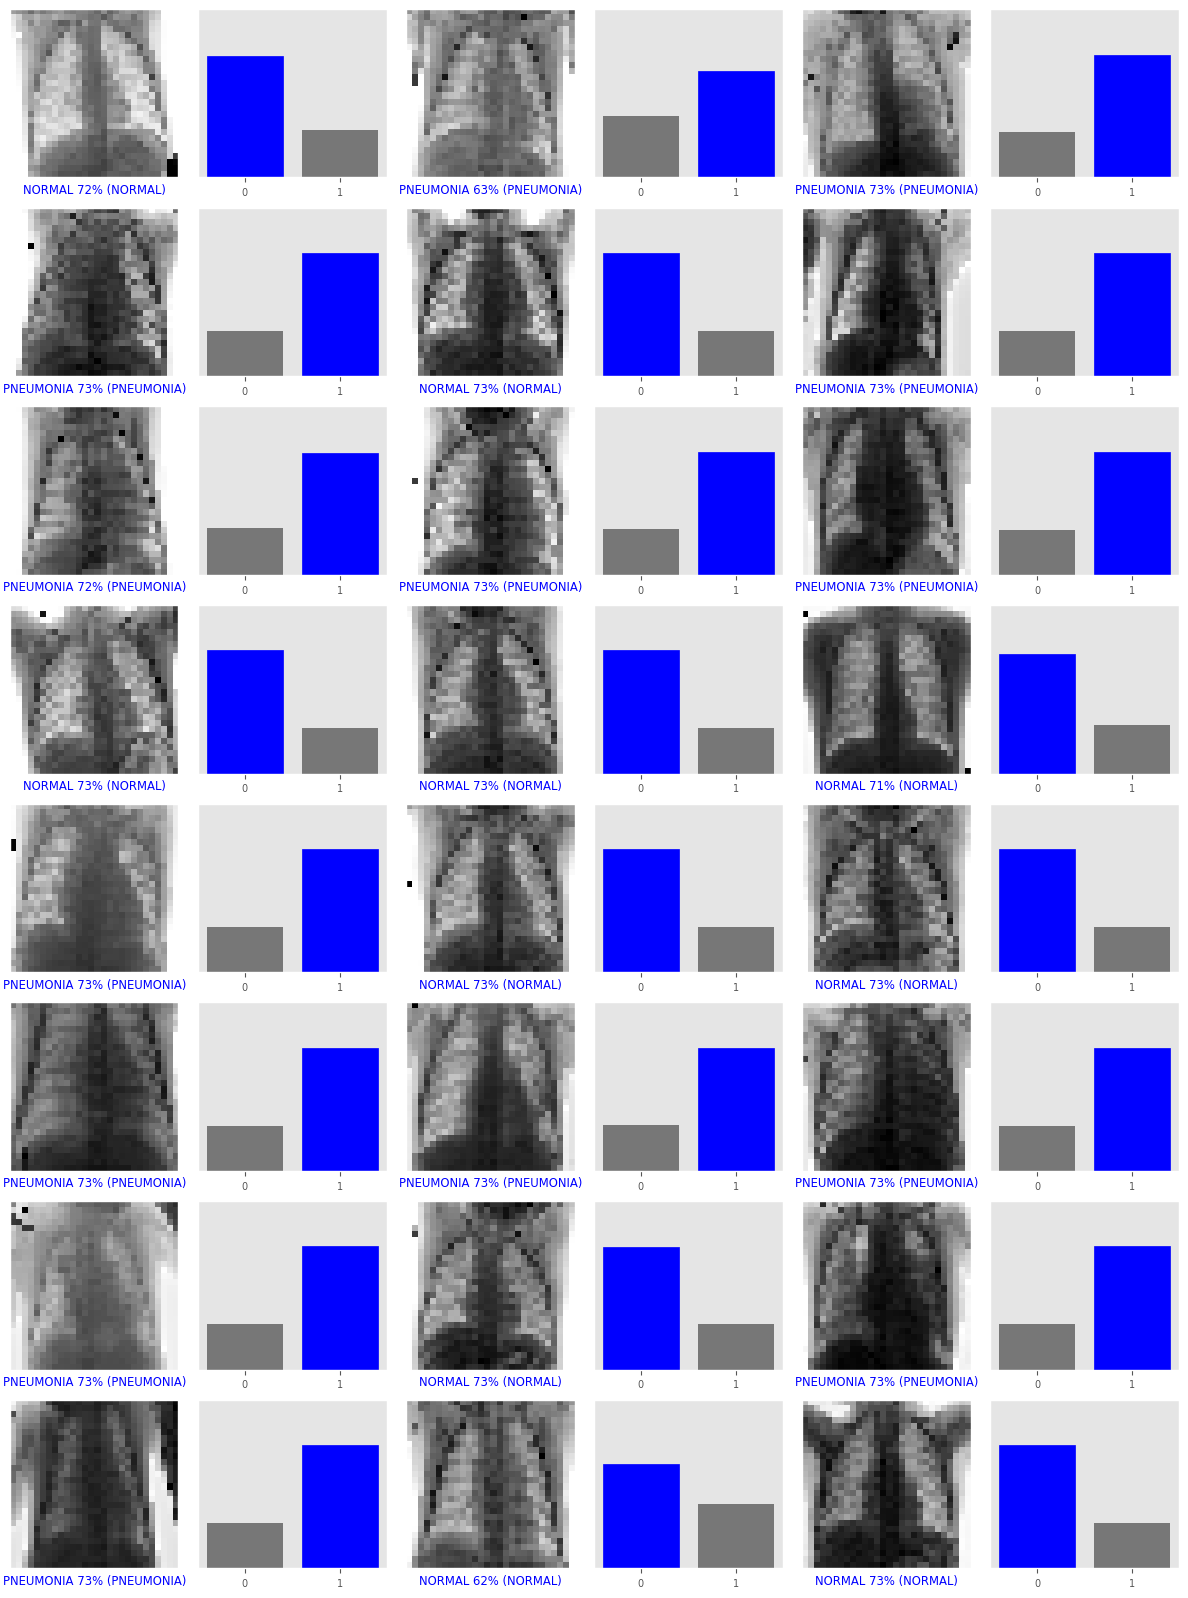

In [14]:
num_rows = 8
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()